<a href="https://colab.research.google.com/github/Rishabh5752/Electricity-Price-Prediction-Using-PCA-and-CNN/blob/main/PCA_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/content/Data.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

import pandas as pd

# Load the CSV file
file_path = '/content/Data.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Select only the first seven columns
selected_columns = data.iloc[:, :7]  # Assuming you want columns 0 through 6 (inclusive)

# Save the modified data to a new CSV file
output_file = '/content/Data.csv'  # Replace with your desired output path
selected_columns.to_csv(output_file, index=False)

print(f"Modified data saved to {output_file}")


Modified data saved to /content/Data.csv


In [18]:
import csv

# Replace 'your_file.csv' with the path to your CSV file
file_path = '/content/Data.csv'

# Function to print the CSV file contents
def print_csv(file_path):
    with open(file_path, 'r', newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            print(row)

# Call the function to print the CSV file contents
print_csv(file_path)


['Date', 'Purchase_Bid', 'Sell_Bid', 'MCV', 'Final_Scheduled_Volume', 'MCP ', 'Weighted_MCP']
['01-06-2022', '195662.72', '196876.93', '125685.87', '125685.87', '6567.19', '7061.28']
['02-06-2022', '222509.54', '208465.83', '147275.88', '147275.86', '7206.03', '7870.0']
['03-06-2022', '211094.42', '207113.85', '139839.84', '139839.84', '6735.32', '7397.86']
['04-06-2022', '236464.27', '194967.59', '144040.6', '144040.6', '7650.32', '8232.92']
['05-06-2022', '221317.07', '206021.94', '140270.0', '140270.0', '7040.7', '7656.35']
['06-06-2022', '271207.82', '213155.01', '166380.21', '166375.41', '8069.69', '8480.74']
['07-06-2022', '207048.59', '245516.8', '147834.12', '147834.12', '6095.86', '6653.04']
['08-06-2022', '220237.05', '239869.0', '146112.9', '146112.9', '6395.89', '7039.19']
['09-06-2022', '230895.25', '232600.36', '149253.3', '149253.3', '6878.2', '7394.51']
['10-06-2022', '227559.77', '228808.1', '151788.43', '151788.43', '7030.0', '7570.89']
['11-06-2022', '235196.39', '20

First few rows of the dataset:
         Date  Purchase_Bid   Sell_Bid        MCV  Final_Scheduled_Volume  \
0  01-06-2022     195662.72  196876.93  125685.87               125685.87   
1  02-06-2022     222509.54  208465.83  147275.88               147275.86   
2  03-06-2022     211094.42  207113.85  139839.84               139839.84   
3  04-06-2022     236464.27  194967.59  144040.60               144040.60   
4  05-06-2022     221317.07  206021.94  140270.00               140270.00   

      MCP   Weighted_MCP  
0  6567.19       7061.28  
1  7206.03       7870.00  
2  6735.32       7397.86  
3  7650.32       8232.92  
4  7040.70       7656.35  

Summary statistics:
        Purchase_Bid       Sell_Bid            MCV  Final_Scheduled_Volume  \
count     365.000000     365.000000     365.000000              365.000000   
mean   246518.014685  264331.015288  143453.972932           143287.921562   
std     57449.719158   51006.939024   24546.195060            24595.279274   
min    1094

<ipython-input-19-079b2eb02dfc>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


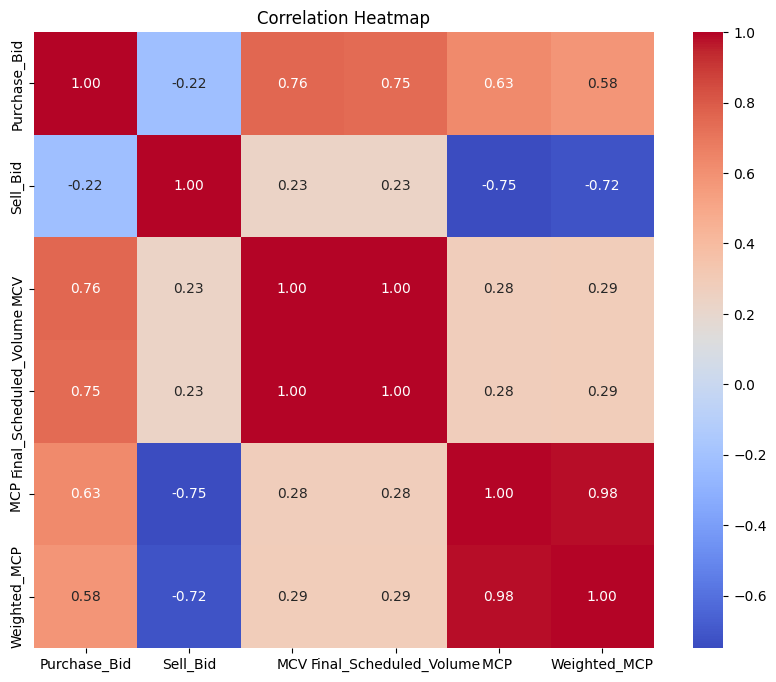

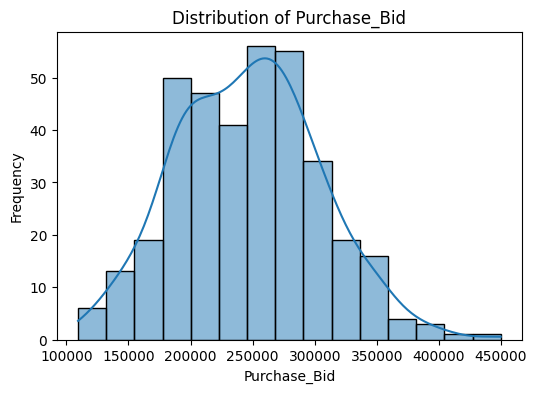

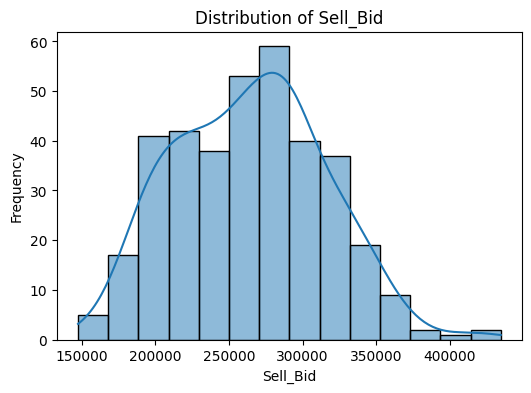

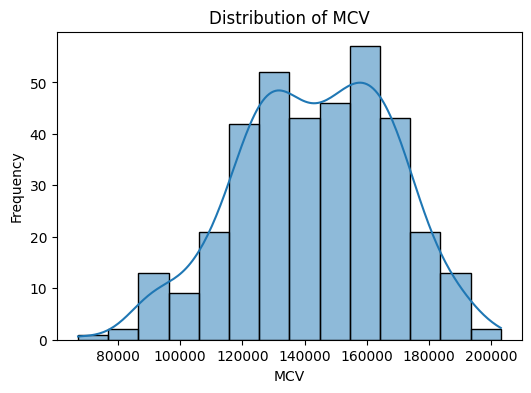

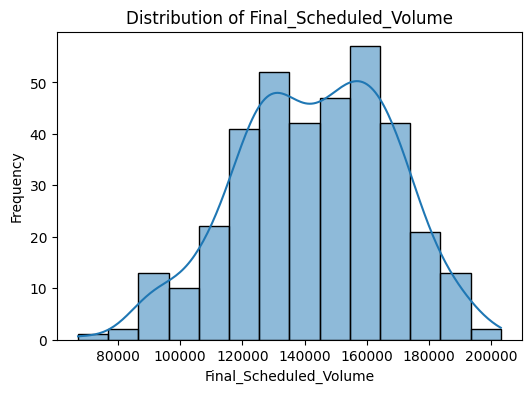

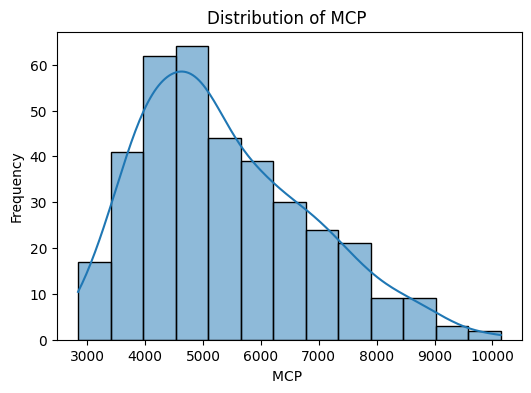

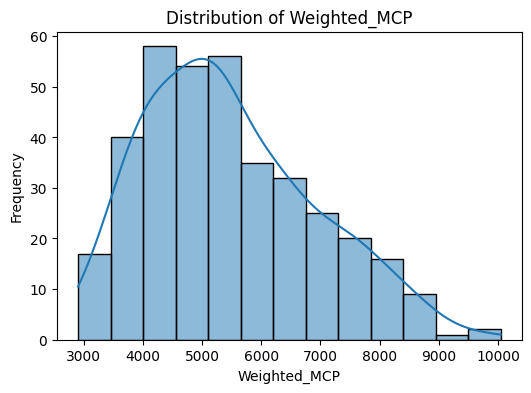

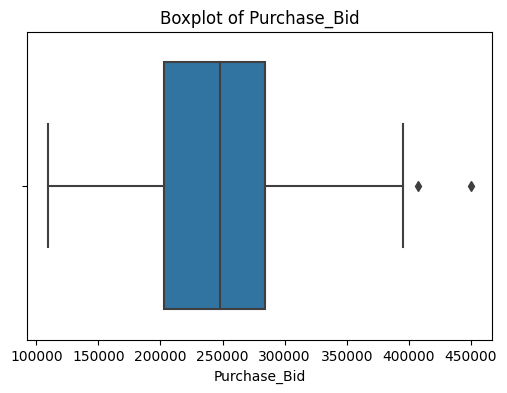

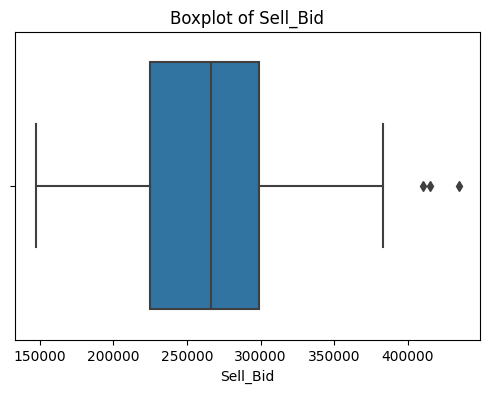

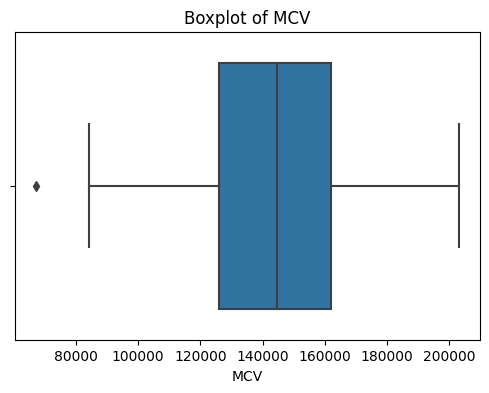

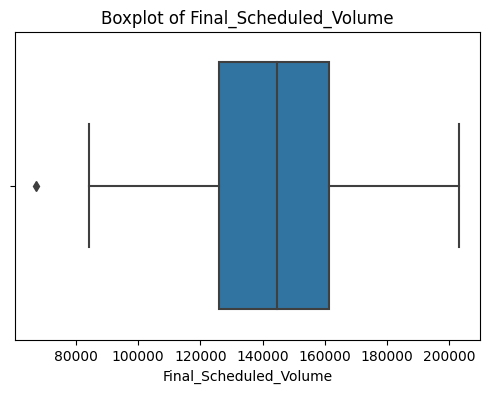

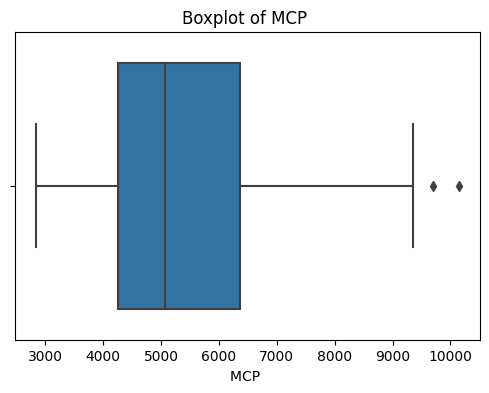

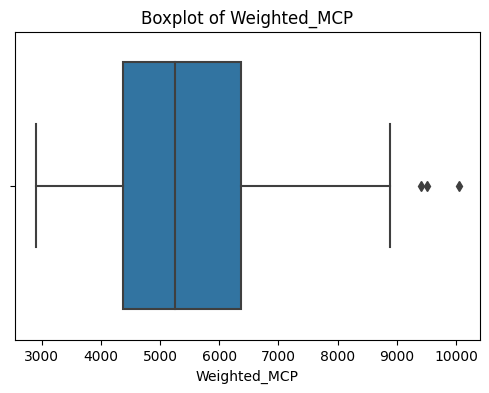

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/content/Data.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Data types of columns
print("\nData types of columns:")
print(data.dtypes)

# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution plots for numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplot for numerical columns
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


In [14]:
#KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV file
file_path = '/content/Data.csv'  # Replace 'your_dataset.csv' with your file path
data = pd.read_csv(file_path)

# Prepare data for KNN
X = data.drop(['Date'], axis=1)  # Features
y = data['Date']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier (you can set k and other parameters)
k = 3  # Number of neighbors (you can adjust this value)
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.00
Classification Report:
              precision    recall  f1-score   support

  01-04-2023       0.00      0.00      0.00       1.0
  01-06-2022       0.00      0.00      0.00       1.0
  01-07-2022       0.00      0.00      0.00       1.0
  01-09-2022       0.00      0.00      0.00       0.0
  01-10-2022       0.00      0.00      0.00       0.0
  01-11-2022       0.00      0.00      0.00       0.0
  01-12-2022       0.00      0.00      0.00       1.0
  02-02-2023       0.00      0.00      0.00       0.0
  02-03-2023       0.00      0.00      0.00       0.0
  02-07-2022       0.00      0.00      0.00       0.0
  02-09-2022       0.00      0.00      0.00       1.0
  02-11-2022       0.00      0.00      0.00       0.0
  03-01-2023       0.00      0.00      0.00       0.0
  03-02-2023       0.00      0.00      0.00       0.0
  03-03-2023       0.00      0.00      0.00       1.0
  03-05-2023       0.00      0.00      0.00       0.0
  03-07-2022       0.00      0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [38]:
#PCA for Linear Correlation
#CNN for Predicting Weighted MCP

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('/content/Data.csv')

# Preprocessing
X = data.drop(['Date', 'Weighted_MCP'], axis=1)  # Features
y = data['Weighted_MCP']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA with a specified number of components
num_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Reshape the data for CNN input
X_train_reshaped = X_train_pca.reshape(X_train_pca.shape[0], X_train_pca.shape[1], 1)
X_test_reshaped = X_test_pca.reshape(X_test_pca.shape[0], X_test_pca.shape[1], 1)

# Building the CNN model
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Hyperparameter tuning
epochs = 1000
batch_size = 32

# Training the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test_reshaped, y_test))

# Evaluate the model
y_pred = model.predict(X_test_reshaped)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Epoch 1/1000
10/10 [==============================] - 1s 32ms/step - loss: 32135858.0000 - mse: 32135858.0000 - mae: 5492.6143 - val_loss: 31238804.0000 - val_mse: 31238804.0000 - val_mae: 5364.4600
Epoch 2/1000
10/10 [==============================] - 0s 9ms/step - loss: 32129652.0000 - mse: 32129652.0000 - mae: 5492.0562 - val_loss: 31232028.0000 - val_mse: 31232028.0000 - val_mae: 5363.8354
Epoch 3/1000
10/10 [==============================] - 0s 9ms/step - loss: 32122638.0000 - mse: 32122638.0000 - mae: 5491.4224 - val_loss: 31223218.0000 - val_mse: 31223218.0000 - val_mae: 5363.0293
Epoch 4/1000
10/10 [==============================] - 0s 9ms/step - loss: 32112212.0000 - mse: 32112212.0000 - mae: 5490.4546 - val_loss: 31210924.0000 - val_mse: 31210924.0000 - val_mae: 5361.9058
Epoch 5/1000
10/10 [==============================] - 0s 8ms/step - loss: 32099062.0000 - mse: 32099062.0000 - mae: 5489.2808 - val_loss: 31193562.0000 - val_mse: 31193562.0000 - val_mae: 5360.3218
Epoch 6/1